# Data Mining Project: PVA Dataset

In this project, the group intends to use the PVA dataset in order to identify behavioral patterns on a sample of donors and derive possible targeted marketing strategies to each profile.

Some preliminary notes:
- Each row corresponds to one particular doner whose unique identifier can be given by CONTROLN.
- The dataset can be split into different datasets.

# Step 1: Split Dataset and vizualize it

In [1]:
#import main libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

sns.set()


In [2]:
#import dataset
dataset = pd.read_csv(r'C:\Users\Ricardo Santos\Desktop\Mestrado Ricardo\Ano 1\Fall Semester\Data Mining\Aulas\Práticas\Git Pull\DMDSAA\group_work\donors.csv', ',', low_memory=False)
del dataset['Unnamed: 0']

dataset.head()                      

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,,...,7.741935,95515,0,L,4,E,X,X,X,C
1,2014-01-01,BOA,1,CA,91326,,,1972-02-01,0,,...,15.666667,148535,0,L,2,G,X,X,X,A
2,2010-01-01,AMH,1,NC,27017,,,NaN,0,,...,7.481481,15078,1,L,4,E,X,X,X,C
3,2007-01-01,BRY,0,CA,95953,,,1948-01-01,0,,...,6.812500,172556,1,L,4,E,X,X,X,C
4,2006-01-01,,0,FL,33176,,,1940-01-01,0,X,...,6.864865,7112,1,L,2,F,X,X,X,A


In [3]:
#from pandas_profiling import ProfileReport

#profile = ProfileReport(dataset, minimal = True)
#profile.to_notebook_iframe()

In [4]:
#ControlN as index and #sort index nbr for better vizualization
dataset = dataset.set_index('CONTROLN', drop = True).sort_index(axis = 0)
dataset.head(20)

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TIMELAG,AVGGIFT,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
CONTROLN,,,,,,,,,,,,,,,,,,,,,
1,2010-01-01,,1,TX,77096,,,1935-09-01,0,,...,3.0,22.750000,0,L,3,F,X,X,X,A
2,2010-01-01,,0,CA,91320,,,1946-09-01,0,,...,4.0,9.812500,0,L,1,F,X,X,X,A
4,2010-01-01,,1,KY,42701,,,1978-05-01,0,,...,3.0,14.928571,1,L,1,F,X,X,X,C
5,2009-01-01,,0,IN,47240,B,,1930-01-01,0,,...,0.0,8.485714,0,L,1,F,X,X,X,D
7,2007-01-01,ASC,0,MN,55102,B,,NaN,0,,...,4.0,10.533088,0,L,1,E,X,X,X,A
8,2009-01-01,,0,IL,60435,B,,NaN,0,,...,0.0,7.600000,0,L,1,F,X,X,X,A
10,2009-01-01,,0,IL,62220,,,1965-01-01,0,,...,0.0,15.384615,1,L,1,G,X,X,X,A
12,2006-01-01,HFS,2,MO,63353,,,1938-04-01,0,,...,12.0,14.720000,0,L,2,E,X,X,X,D
13,2009-01-01,,1,TX,75007,,,1945-11-01,0,,...,2.0,9.045455,1,L,4,F,X,X,X,A


In [5]:
dataset.tail(20)

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TIMELAG,AVGGIFT,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
CONTROLN,,,,,,,,,,,,,,,,,,,,,
191746,2015-01-01,ASE,1,FL,32179,,,NaN,0,X,...,NaN,15.000000,1,L,1,F,X,X,X,C
191747,2011-01-01,CNC,2,GA,30083,,,NaN,0,X,...,5.0,15.538462,1,L,2,G,X,X,X,A
191748,2015-01-01,L21,3,TN,38301,,,1945-01-01,0,X,...,8.0,12.750000,1,L,3,F,X,X,X,C
191749,2006-01-01,GUR,2,WI,53714-,,,NaN,0,X,...,6.0,4.823529,0,L,3,D,X,X,X,B
191751,2006-01-01,ASC,2,CA,92631,,,1946-01-01,0,X,...,2.0,8.600000,0,L,1,E,X,X,X,NaN
191754,2008-01-01,APP,28,FL,33138,,,1952-01-01,0,X,...,5.0,10.000000,1,L,1,F,X,X,X,A
191755,2009-01-01,HCC,28,MI,48185,,,1964-02-01,0,X,...,18.0,12.857143,1,L,1,F,X,X,X,A
191756,2006-01-01,BHG,0,MI,48439,,,1945-08-01,0,X,...,6.0,7.280000,0,L,2,E,X,X,X,B
191758,2006-01-01,GRI,0,WA,98336,,,1942-09-01,0,X,...,12.0,11.909091,1,L,1,F,X,X,X,C


The dataset has, in total, 474 columns. It is important to note that we can split the dataset in different, smaller datasets.
We will follow the same structure as the one presented in the data dictionary. As a first split, the data will be split as such:

**1) Personal information (General personal information : ODATEW - HIT and ADATE_2 - GEOCODE 2)**

**2) Data about personal preferences,** 

**3) Neighborhood information - Data from Census and other Third Parties.**

If needed, we may consider additional splits.

Procedures:
- Create dataframes.

- Check datatypes of each column in different dataframes

- Split the data on each dataframe,

- Check the descriptive statistics of numerical variables,

- make some preliminary visualizations,

- deal with Nas or make the relevant manipulations,

- Choose which variables to take to next steps.

# Personal Data

From the previous separation, we can start by looking for relationships in the census subset. That is because, in this subset, all elements are numbers.

In [6]:
#First Split, Location Based - Depends on Column Order
#remove personal data and donation data
personal = dataset[ list(dataset.loc[:,'ODATEDW' : 'HIT']) + list(dataset.loc[:,'ADATE_2':'GEOCODE2']) ]
personal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 1 to 191779
Columns: 141 entries, ODATEDW to GEOCODE2
dtypes: float64(31), int64(10), object(100)
memory usage: 103.4+ MB


In [7]:
#Split between numeric feats and non numeric features
#personal_cat with non numeric feats
personal_cat = list(personal.select_dtypes(include=['object']).columns)

In [8]:
#personal_nbrt with numeric values
personal_nbr = list(personal.select_dtypes(exclude=['object']).columns)

In [9]:
#check descriptive stats
personal[['RAMNTALL', 'AVGGIFT']].describe().T 

,count,mean,std,min,25%,50%,75%,max
RAMNTALL,95412.0,104.489351,118.580367,13.000000,40.000000,78.000000,131.000000,9485.0
AVGGIFT,95412.0,13.347786,10.769997,1.285714,8.384615,11.636364,15.477955,1000.0


<AxesSubplot:xlabel='CONTROLN'>

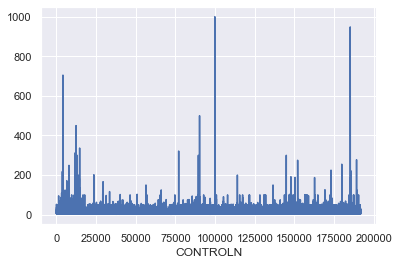

In [10]:
personal['AVGGIFT'].plot()

<AxesSubplot:xlabel='CONTROLN'>

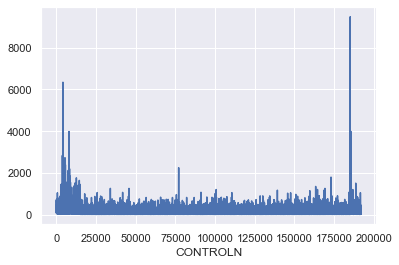

In [11]:
personal['RAMNTALL'].plot()

<AxesSubplot:xlabel='CONTROLN'>

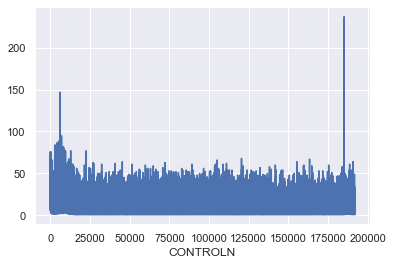

In [12]:
personal['NGIFTALL'].plot()

In [13]:
#check percentage of missing values in each numerical feature

(personal[personal_nbr].isna().sum()/len(personal)*100).sort_values(ascending = False)

RAMNT_5     99.990567
RAMNT_3     99.746363
RAMNT_4     99.705488
RAMNT_6     99.186685
RAMNT_15    92.388798
RAMNT_23    91.763091
RAMNT_20    91.732696
RAMNT_7     90.677273
RAMNT_17    90.146942
RAMNT_21    90.029556
RAMNT_10    89.035970
RAMNT_13    87.160944
NUMCHLD     87.018404
RAMNT_11    84.551209
RAMNT_19    83.359535
RAMNT_9     82.461326
RAMNT_24    81.409047
RAMNT_18    79.270951
RAMNT_22    78.123297
RAMNT_8     77.495493
RAMNT_14    75.561774
RAMNT_12    73.064185
RAMNT_16    71.707961
WEALTH1     46.882992
INCOME      22.309563
TIMELAG     10.452564
CARDPM12     0.000000
NUMPRM12     0.000000
NUMPROM      0.000000
CARDPROM     0.000000
HIT          0.000000
RFA_2F       0.000000
HPHONE_D     0.000000
RAMNTALL     0.000000
NGIFTALL     0.000000
CARDGIFT     0.000000
MINRAMNT     0.000000
MAXRAMNT     0.000000
LASTGIFT     0.000000
AVGGIFT      0.000000
TCODE        0.000000
dtype: float64

In [14]:
#do the same on the categorical variables
#get list of categoricals with 
nan_pcat = list([col for col in personal[personal_cat].columns if personal[col].isnull().any()])

#check percentage of missing values
(personal[nan_pcat].isna().sum()/len(personal)*100).sort_values(ascending = False)

RDATE_5     99.990567
RDATE_3     99.746363
RDATE_4     99.705488
RDATE_6     99.186685
RDATE_15    92.388798
RDATE_23    91.763091
RDATE_20    91.732696
RDATE_7     90.677273
RDATE_17    90.146942
RDATE_21    90.029556
RDATE_10    89.035970
RDATE_13    87.160944
RDATE_11    84.551209
RDATE_19    83.359535
RDATE_9     82.461326
RDATE_24    81.409047
RDATE_18    79.270951
RDATE_22    78.123297
RDATE_8     77.495493
RDATE_14    75.561774
RDATE_12    73.064185
RDATE_16    71.707961
ADATE_15    68.625540
ADATE_23    58.975810
ADATE_20    52.613927
ADATE_13    42.152979
ADATE_24    38.750891
ADATE_21    36.905211
ADATE_5     35.205215
ADATE_10    34.322727
ADATE_17    28.979583
ADATE_22    26.881315
ADATE_19    25.657150
DOB         25.031443
ADATE_18    22.285457
ADATE_16    21.343227
ADATE_14    19.774242
ADATE_9     11.785729
ADATE_11    10.923154
NEXTDATE    10.452564
ADATE_12     9.352073
ADATE_7      9.300717
ADATE_6      3.728043
ADATE_8      3.679831
ADATE_4      2.296357
ADATE_3   

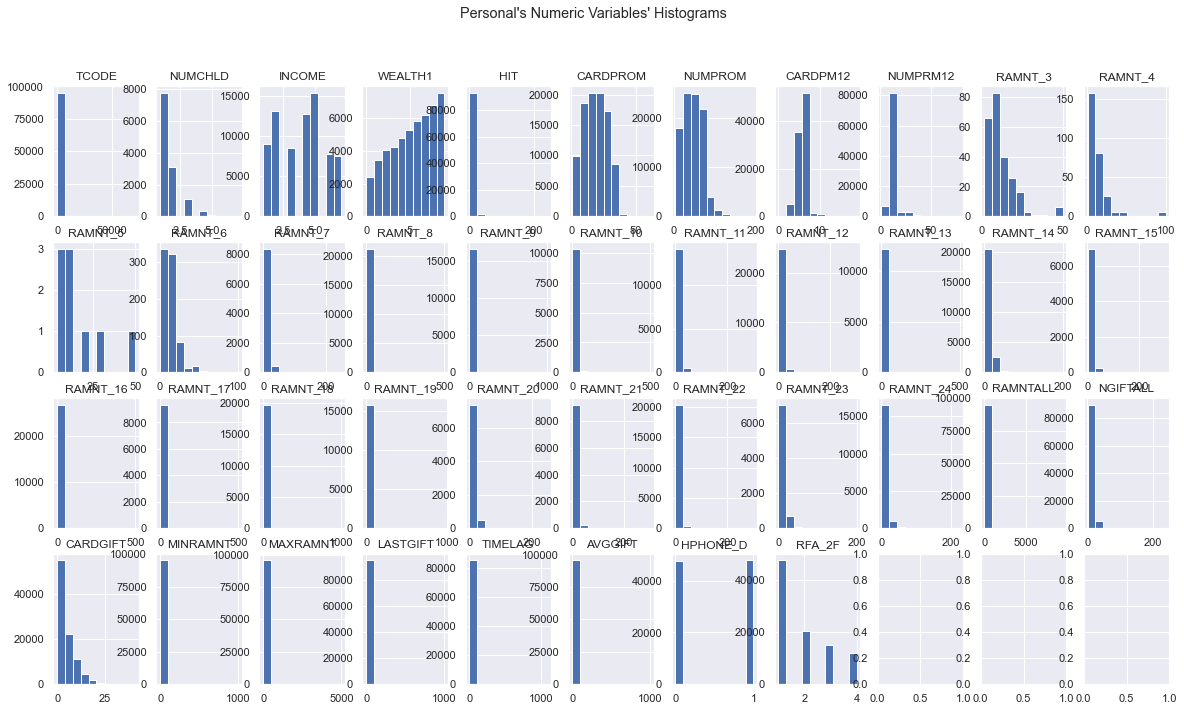

In [25]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(4, ceil(len(personal_nbr) / 4), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), personal_nbr): # Notice the zip() function and flatten() method
    ax.hist(personal[feat])
    ax.set_title(feat)
    
# Layout
# Add a centered title to the figure:
title = "Personal's Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

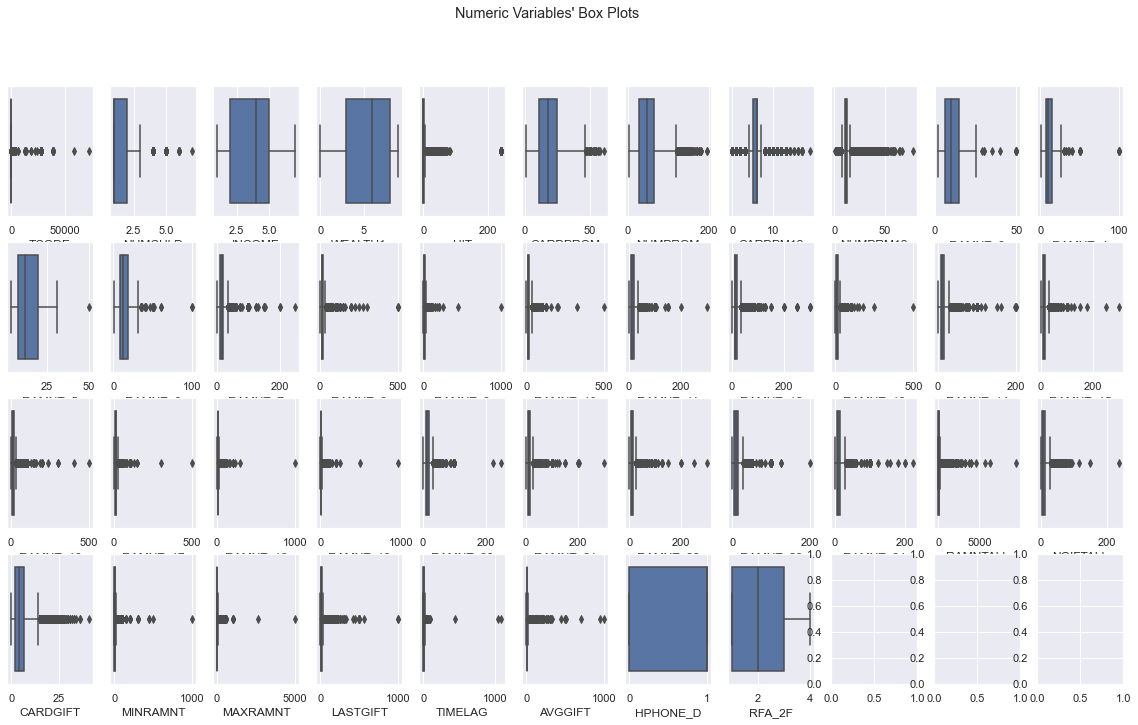

In [16]:
# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(4, ceil(len(personal_nbr) / 4), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), personal_nbr): # Notice the zip() function and flatten() method
    sns.boxplot(x=personal[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [17]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(personal[personal_nbr], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001AD1E5C9DC0> (for post_execute):


KeyboardInterrupt: 

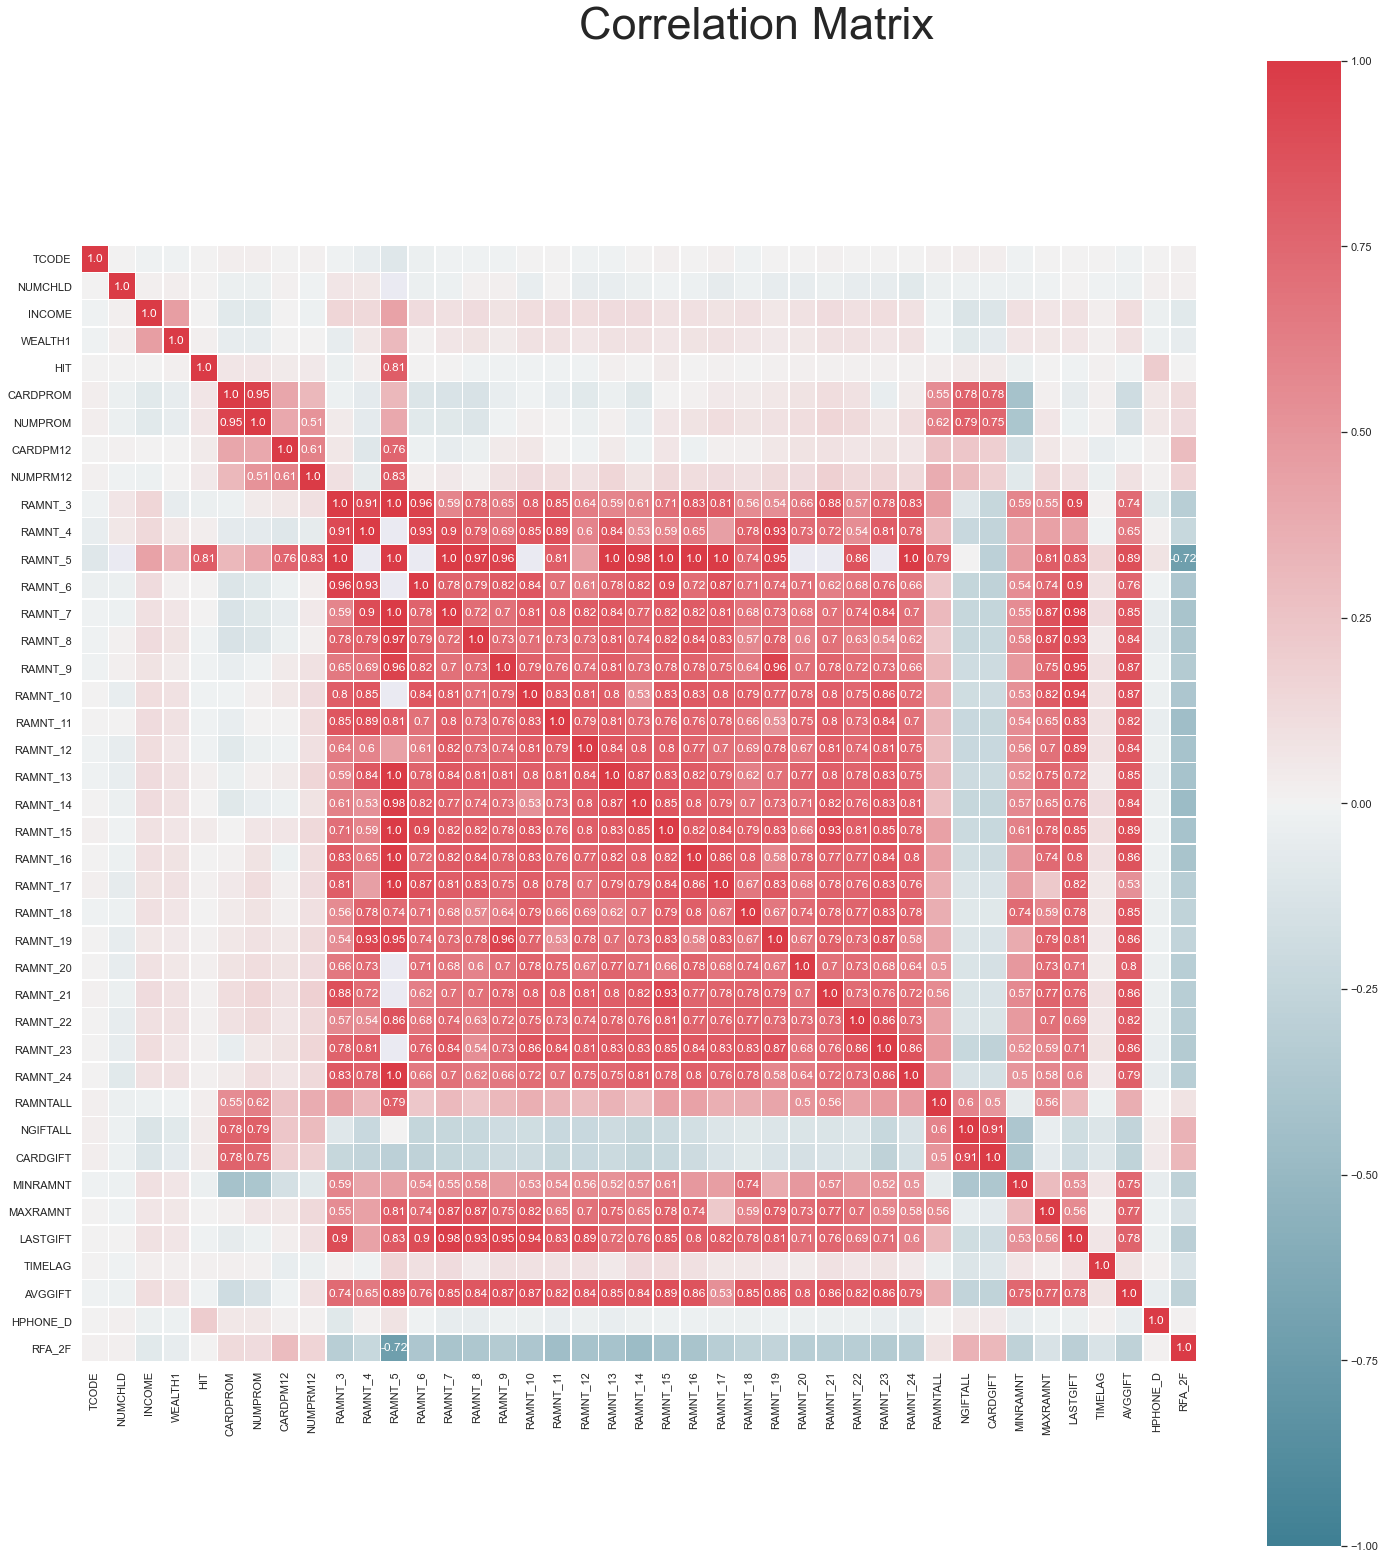

In [18]:
# Prepare figure
fig = plt.figure(figsize=(25, 25))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(personal[personal_nbr].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=45)

plt.show()

# VARIABLES TO DROP FROM PERSONAL DF:

- PVASTATE - Very little number of non-empty cells 
- MAILCODE - Residual number of invalid addresses
- HOMEOWNER - To be looked at, but it does indicate that there is not a huge discrepancy between the number of homeowners and non donors.
- All Non Summary Variables converning RFA, RDATE, ADATE, RAMNT.


# Preferences dataset:

In [19]:
#Preferences from 3rd party sources

#remove personal data and donation data
preferences = dataset.loc[:,'MBCRAFT' : 'PEPSTRFL']
preferences.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 1 to 191779
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MBCRAFT   42558 non-null  float64
 1   MBGARDEN  42558 non-null  float64
 2   MBBOOKS   42558 non-null  float64
 3   MBCOLECT  42498 non-null  float64
 4   MAGFAML   42558 non-null  float64
 5   MAGFEM    42558 non-null  float64
 6   MAGMALE   42558 non-null  float64
 7   PUBGARDN  42558 non-null  float64
 8   PUBCULIN  42558 non-null  float64
 9   PUBHLTH   42558 non-null  float64
 10  PUBDOITY  42558 non-null  float64
 11  PUBNEWFN  42558 non-null  float64
 12  PUBPHOTO  42558 non-null  float64
 13  PUBOPP    42558 non-null  float64
 14  DATASRCE  95412 non-null  object 
 15  MALEMILI  95412 non-null  int64  
 16  MALEVET   95412 non-null  int64  
 17  VIETVETS  95412 non-null  int64  
 18  WWIIVETS  95412 non-null  int64  
 19  LOCALGOV  95412 non-null  int64  
 20  STATEGOV  95412 non-null  i

In [20]:
#Split between numeric feats and non numeric features
#personal_cat with non numeric feats
pref_cat = list(preferences.select_dtypes(include=['object']).columns)

In [21]:
#Split between numeric feats and non numeric features
#personal_cat with non numeric feats
pref_nbr = list(preferences.select_dtypes(exclude=['object']).columns)

In [34]:
preferences.describe().T 

,count,mean,std,min,25%,50%,75%,max
MBCRAFT,42558.0,0.152075,0.470023,0.0,0.0,0.0,0.0,6.0
MBGARDEN,42558.0,0.059166,0.262078,0.0,0.0,0.0,0.0,4.0
MBBOOKS,42558.0,1.116382,1.669967,0.0,0.0,0.0,2.0,9.0
MBCOLECT,42498.0,0.063932,0.297344,0.0,0.0,0.0,0.0,6.0
MAGFAML,42558.0,0.448329,0.821010,0.0,0.0,0.0,1.0,9.0
MAGFEM,42558.0,0.126322,0.380916,0.0,0.0,0.0,0.0,5.0
MAGMALE,42558.0,0.065722,0.276398,0.0,0.0,0.0,0.0,4.0
PUBGARDN,42558.0,0.141806,0.490414,0.0,0.0,0.0,0.0,5.0
PUBCULIN,42558.0,0.145237,0.427822,0.0,0.0,0.0,0.0,6.0
PUBHLTH,42558.0,0.714484,1.249891,0.0,0.0,0.0,1.0,9.0


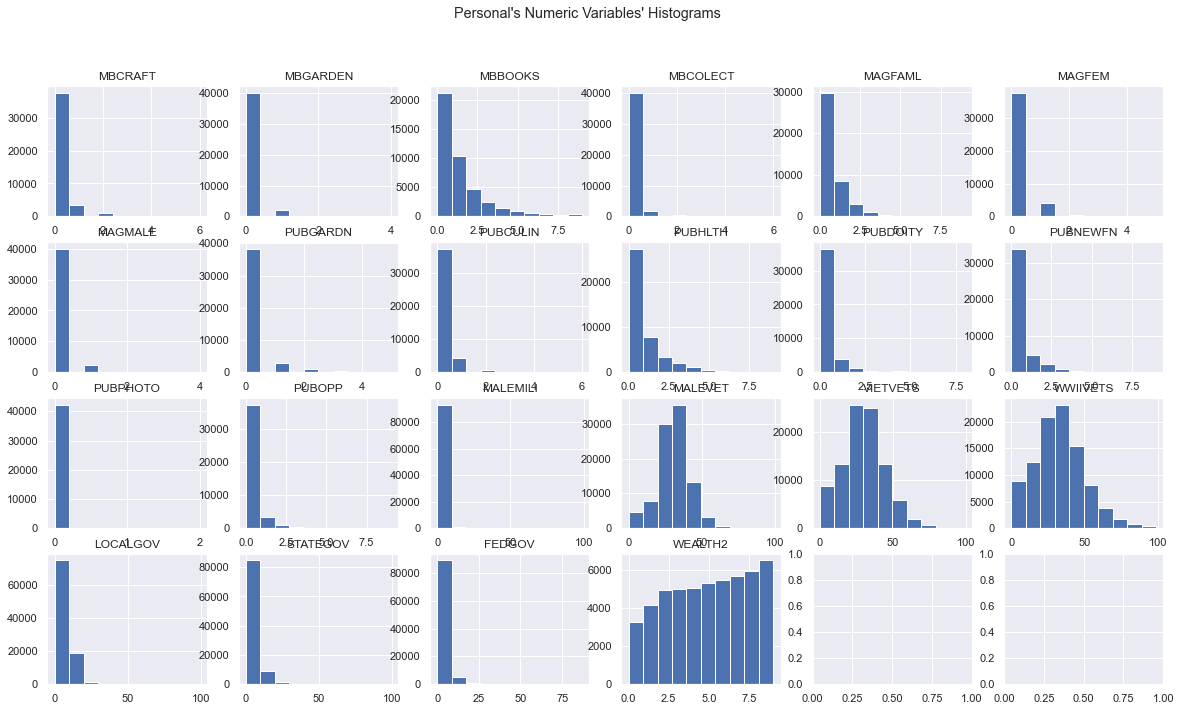

In [28]:
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(4, ceil(len(pref_nbr) / 4), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), pref_nbr): # Notice the zip() function and flatten() method
    ax.hist(preferences[feat])
    ax.set_title(feat)
    
# Layout
# Add a centered title to the figure:
title = "Personal's Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

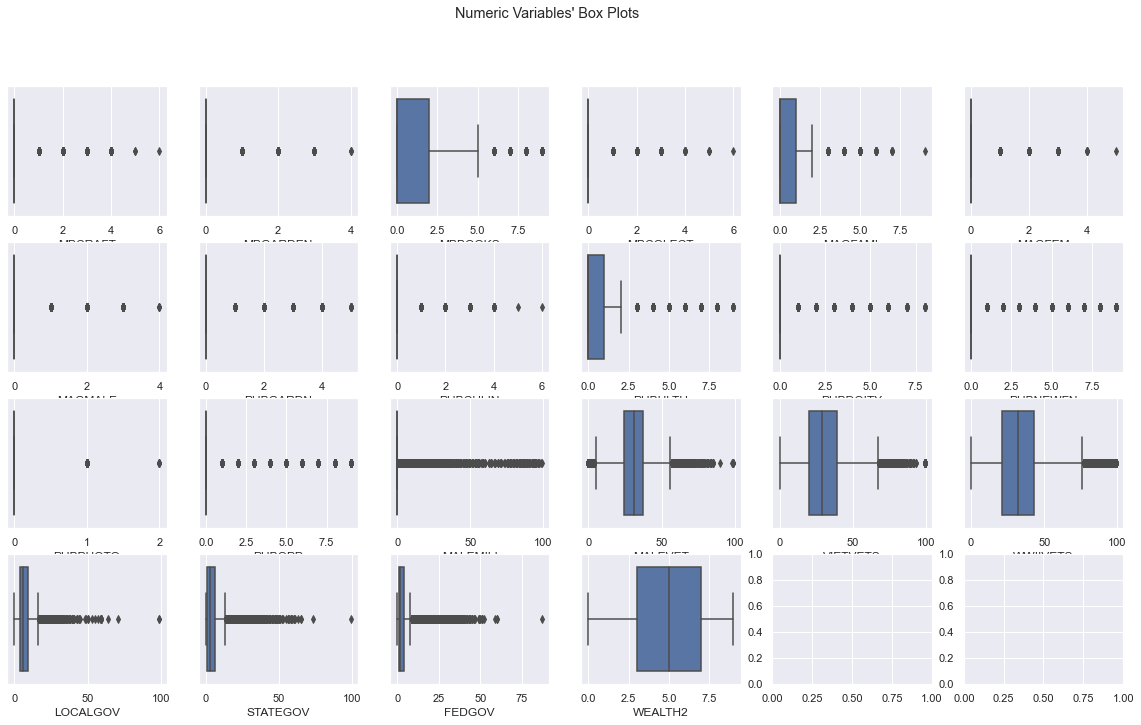

In [29]:
# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(4, ceil(len(pref_nbr) / 4), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), pref_nbr): # Notice the zip() function and flatten() method
    sns.boxplot(x=preferences[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

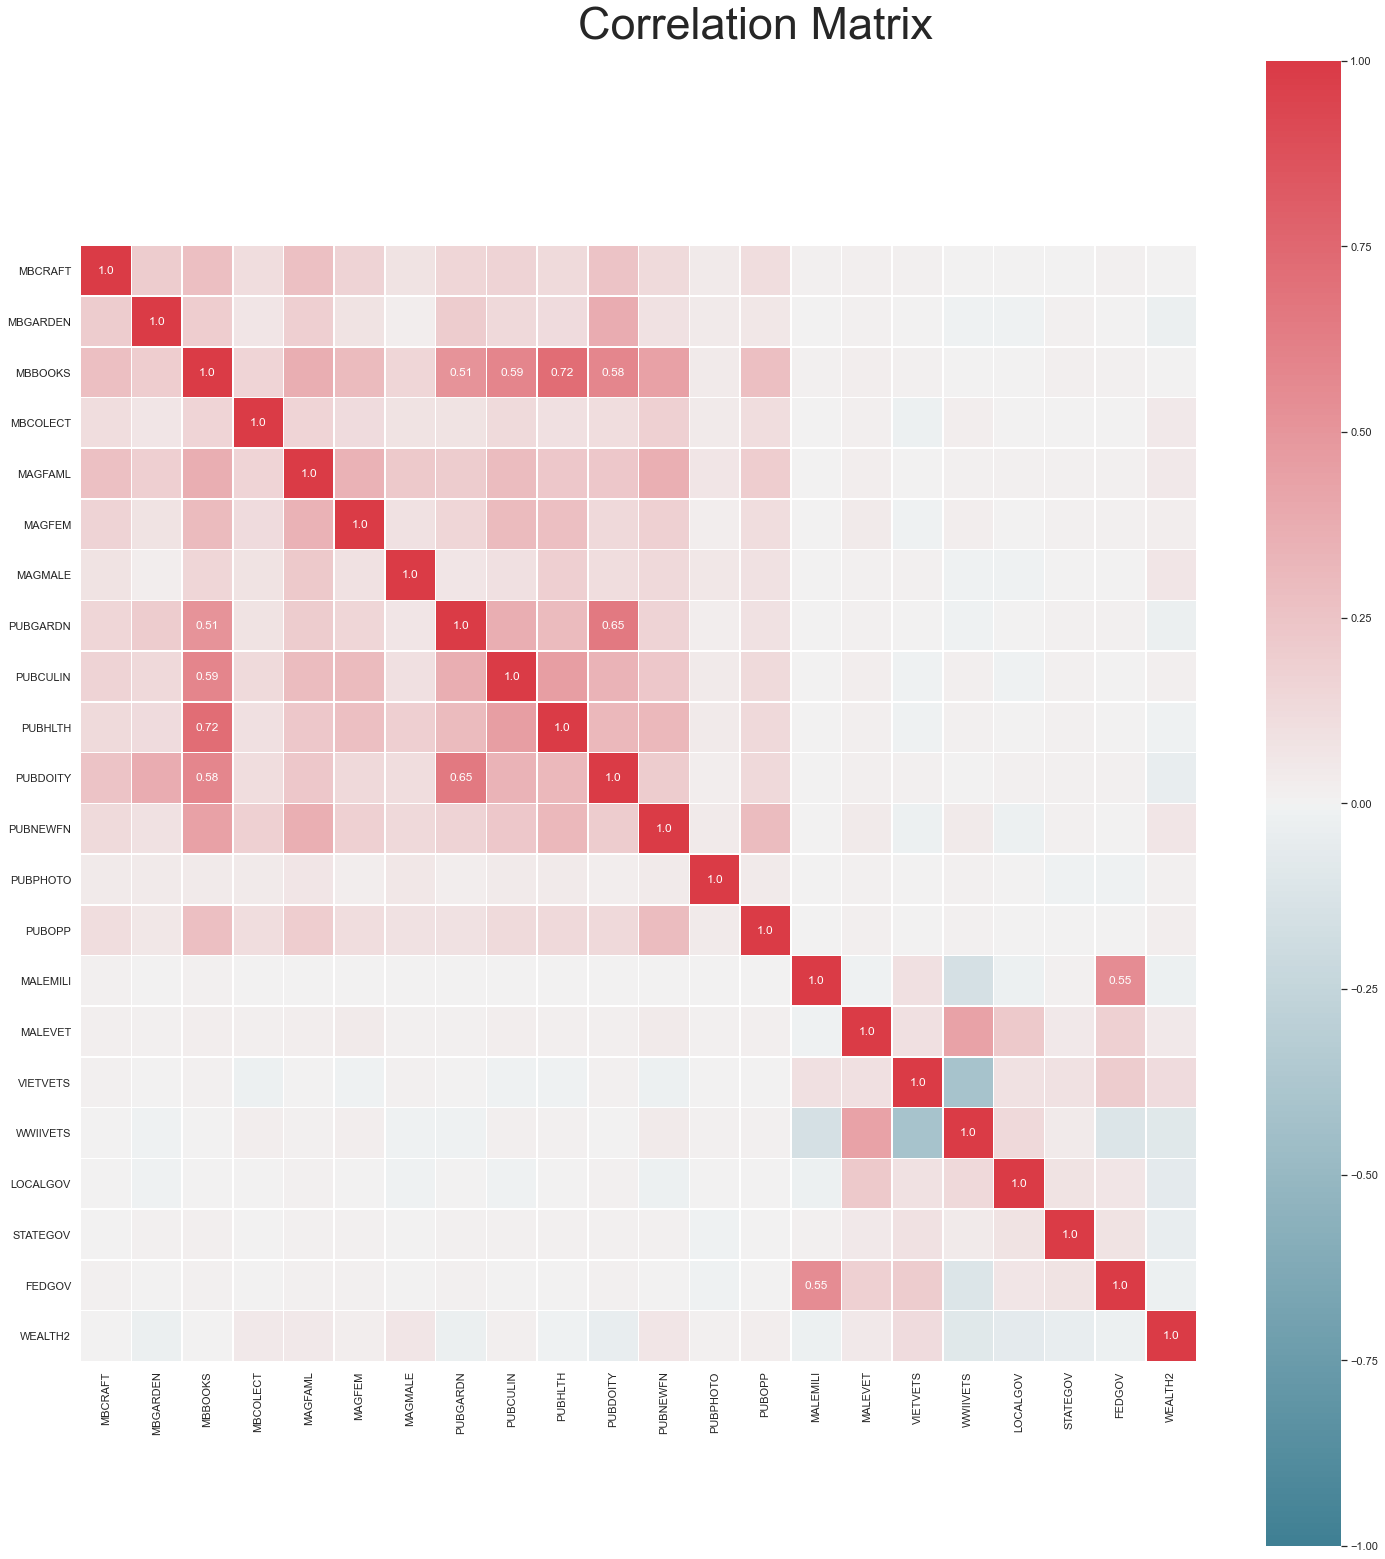

In [30]:
# Prepare figure
fig = plt.figure(figsize=(25, 25))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(preferences[pref_nbr].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=45)

plt.show()

In [39]:
preferences['Gender'] = dataset['GENDER']

In [40]:
male = preferences.loc[preferences['Gender'] == 'M']
male_nbr = list(male.select_dtypes(exclude=['object']).columns)

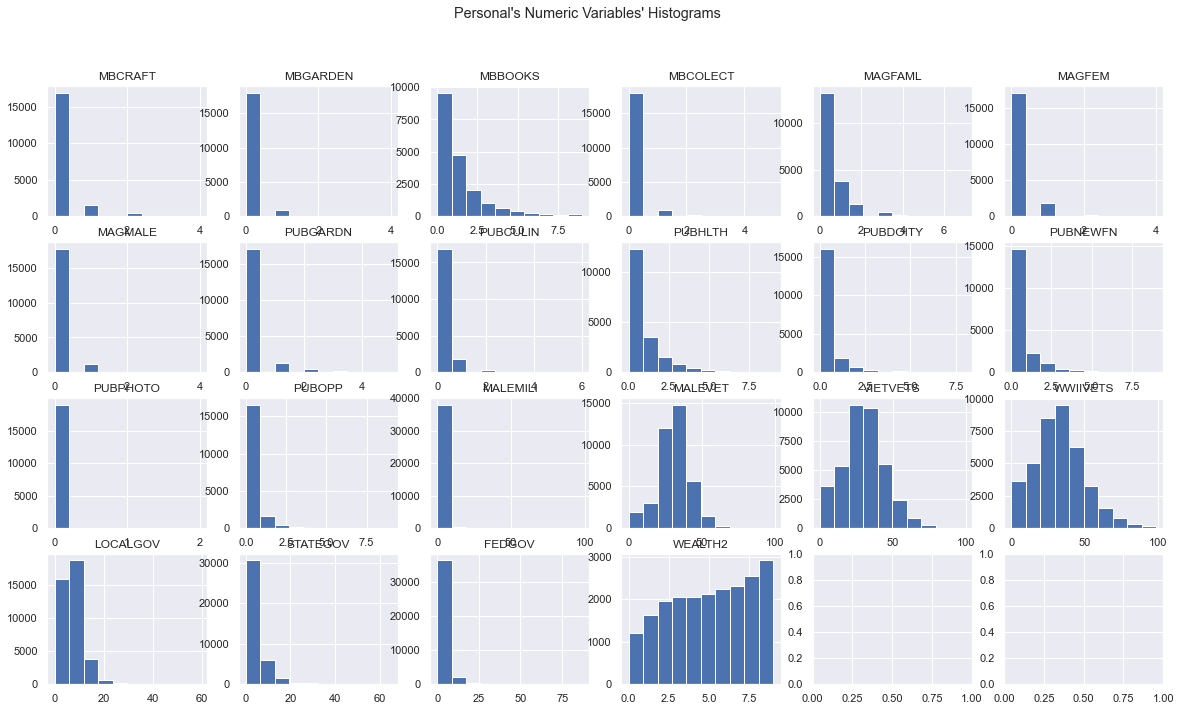

In [44]:
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(4, ceil(len(male_nbr) / 4), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), male_nbr): # Notice the zip() function and flatten() method
    ax.hist(male[feat])
    ax.set_title(feat)
    
# Layout
# Add a centered title to the figure:
title = "Personal's Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

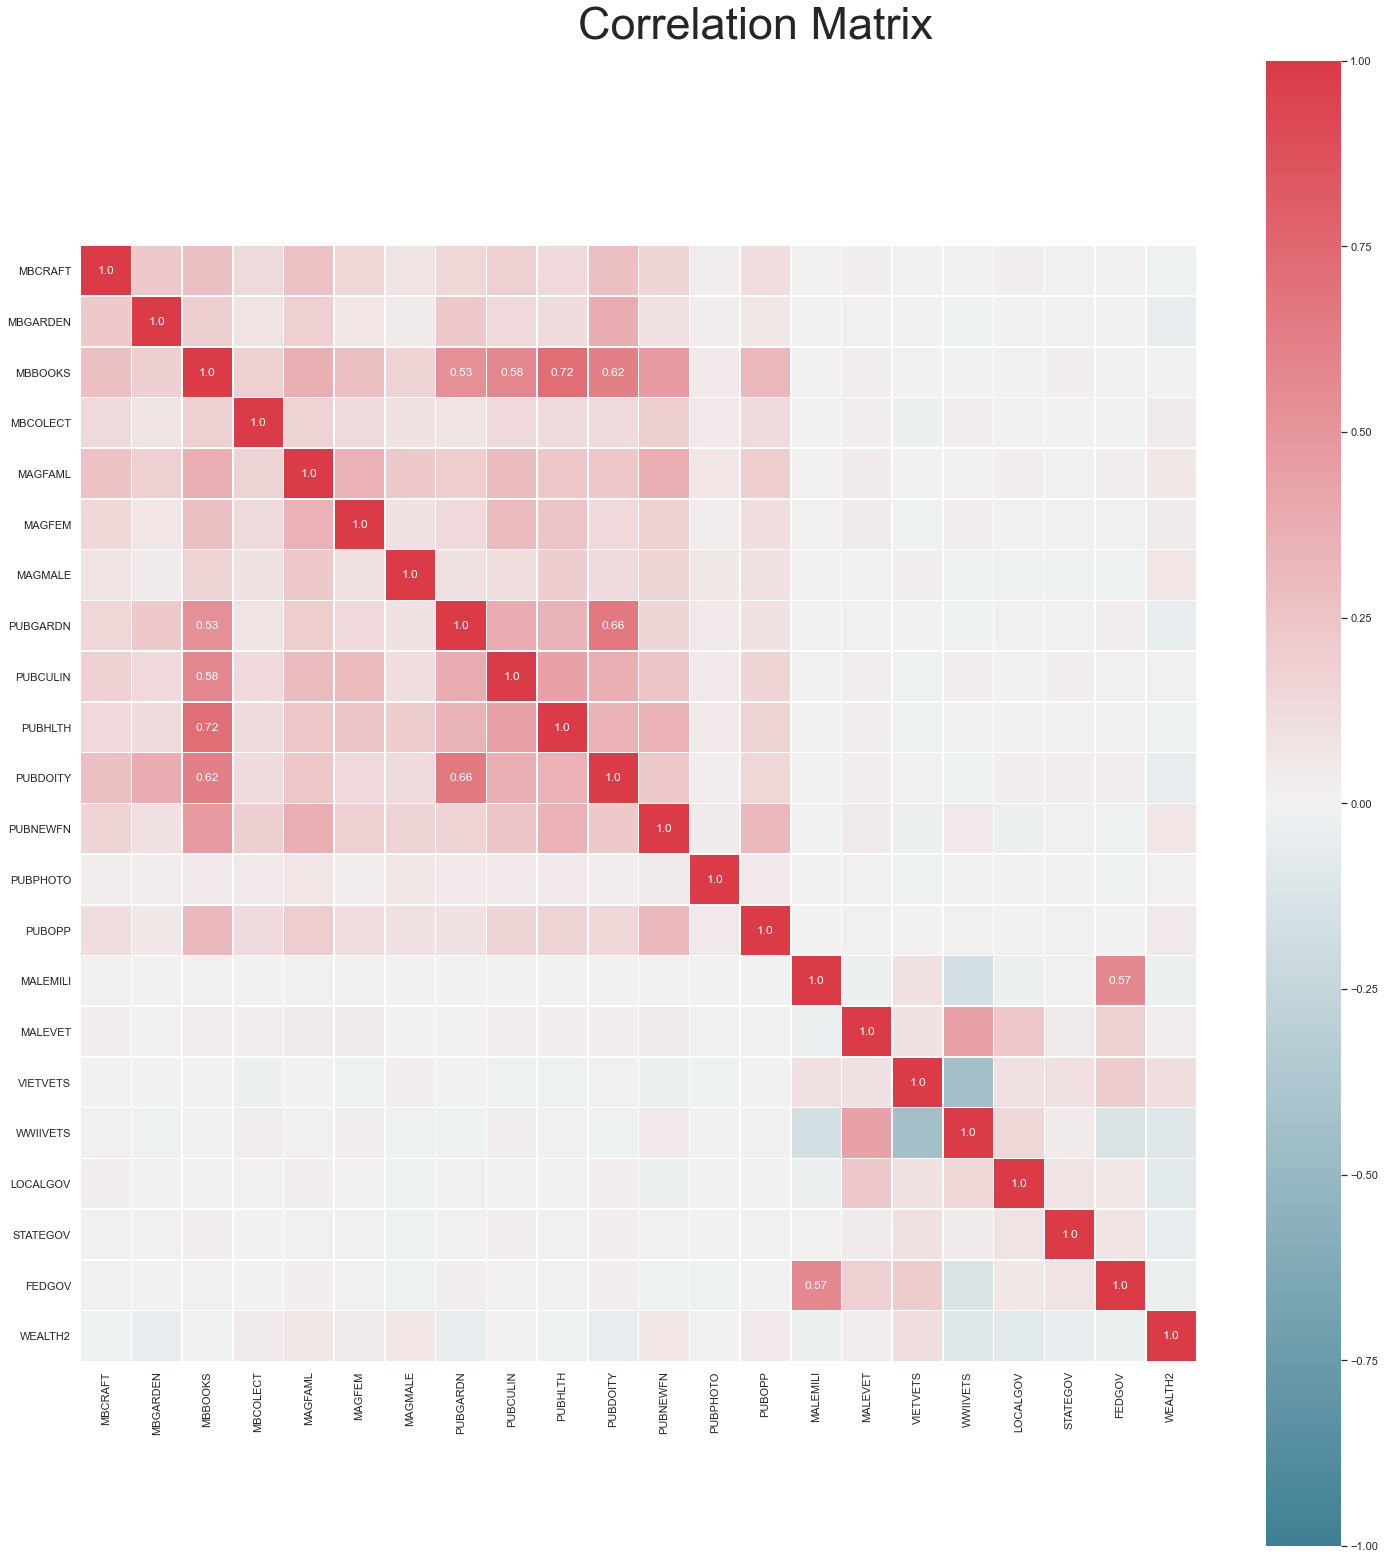

In [41]:
# Prepare figure
fig = plt.figure(figsize=(25, 25))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(male[male_nbr].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=45)

plt.show()

In [42]:
female = preferences.loc[preferences['Gender'] == 'F']
female_nbr = list(female.select_dtypes(exclude=['object']).columns)

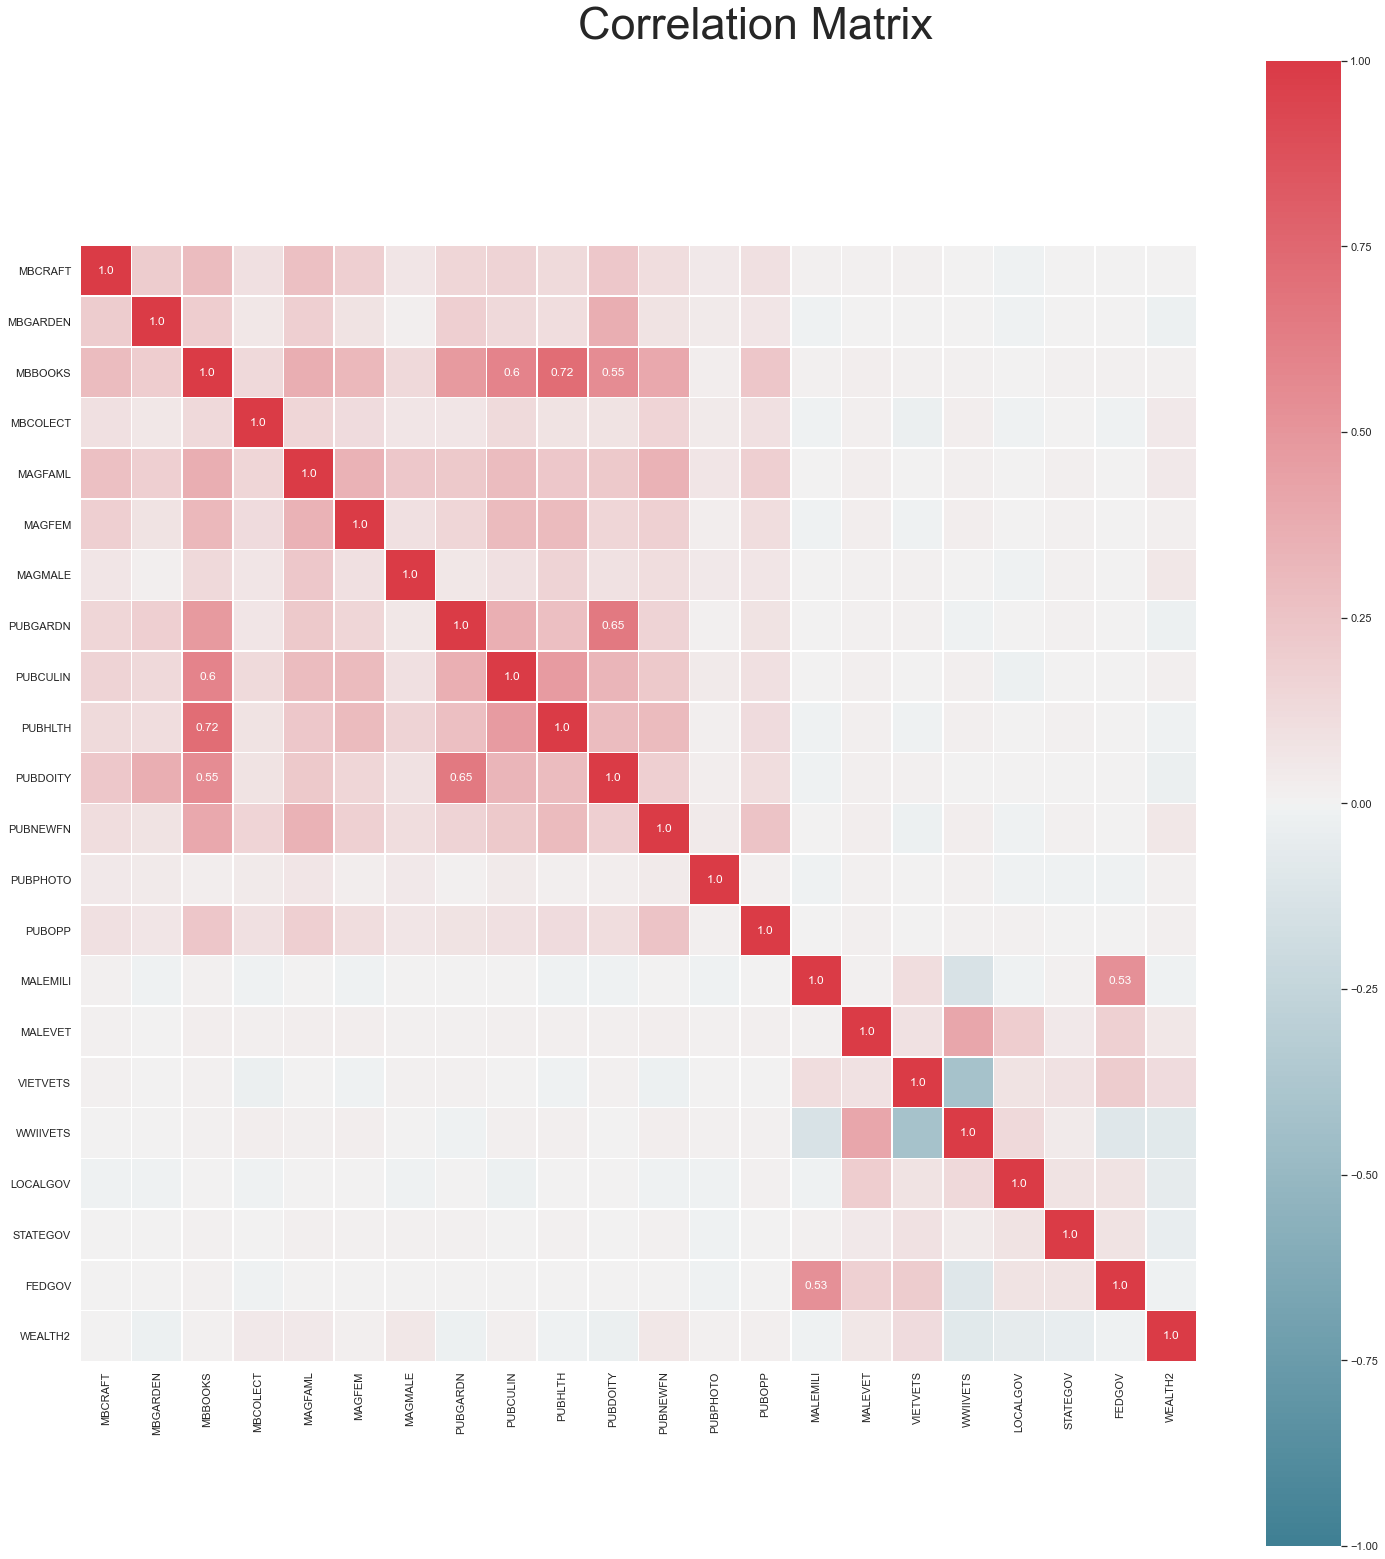

In [43]:
# Prepare figure
fig = plt.figure(figsize=(25, 25))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(female[female_nbr].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=45)

plt.show()

In [22]:
#and census data

census = dataset.loc[:, 'POP901':'AC2']
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 1 to 191779
Columns: 286 entries, POP901 to AC2
dtypes: float64(3), int64(283)
memory usage: 208.9 MB


In [32]:
census_cat = list(census.select_dtypes(include=['object']).columns)

In [31]:
census_nbr = list(census.select_dtypes(exclude=['object']).columns)

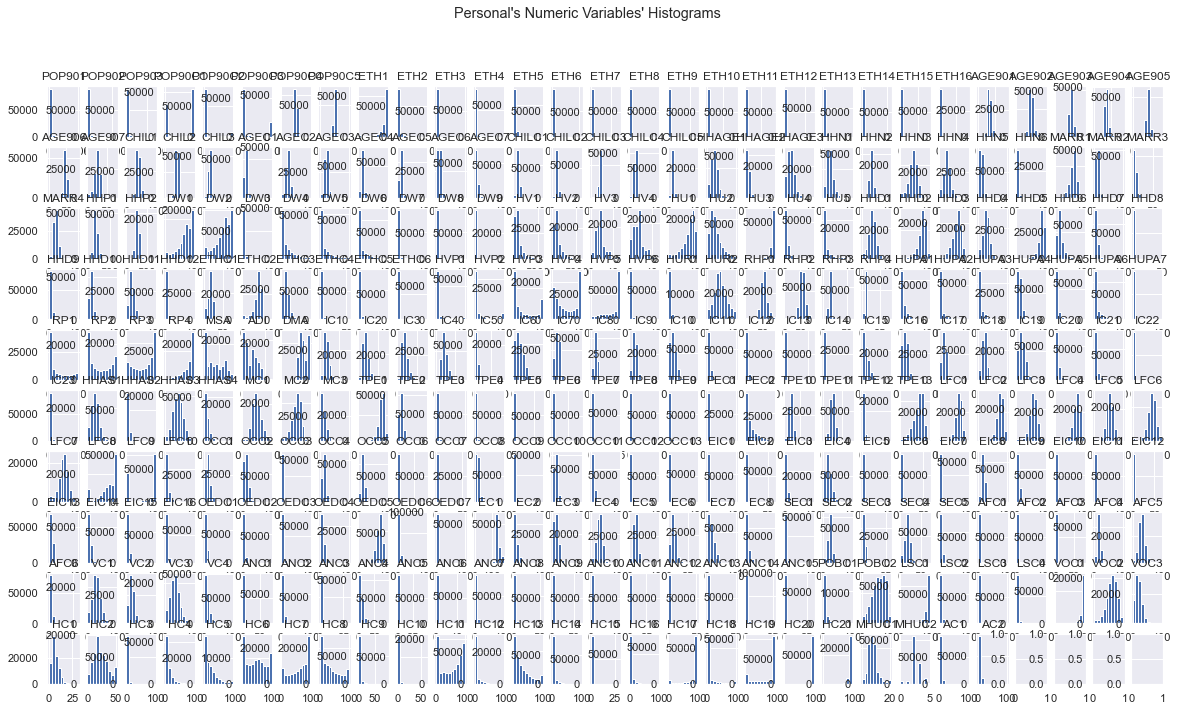

In [37]:
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(10, ceil(len(census_nbr) / 10), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), census_nbr): # Notice the zip() function and flatten() method
    ax.hist(census[feat])
    ax.set_title(feat)
    
# Layout
# Add a centered title to the figure:
title = "Personal's Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

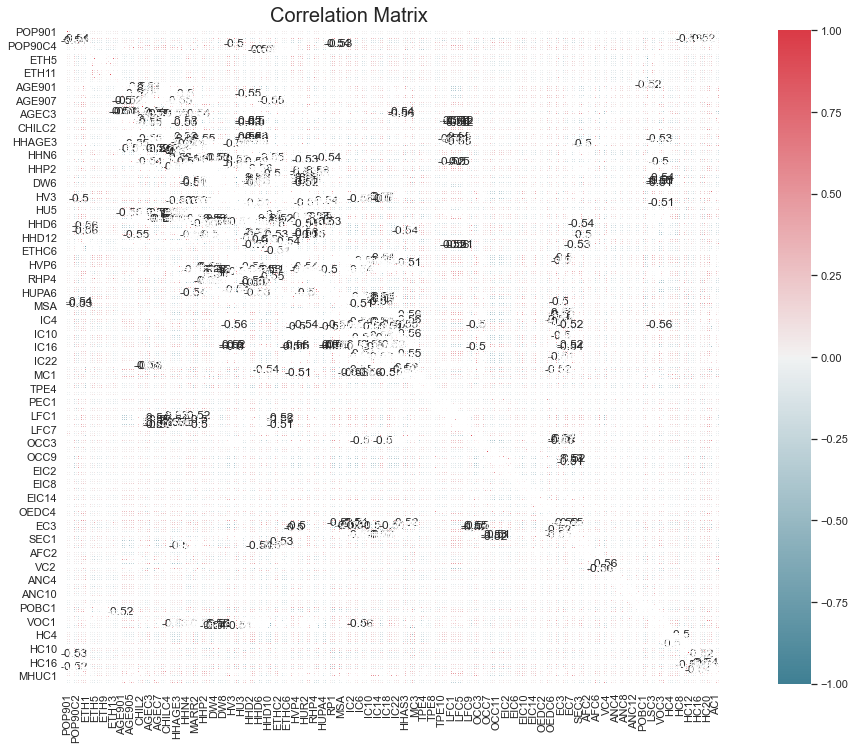

In [45]:
# Prepare figure
fig = plt.figure(figsize=(21, 11))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(census[census_nbr].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

In [55]:
group = personal.groupby(['ZIP'])['RAMNTALL'].mean().nlargest(20)

In [56]:
group

ZIP
61801-    9485.000
61110     5674.900
52803-    2837.000
32825-    2827.000
75243-    2380.000
49841-    2200.000
33303     1851.000
53597-    1625.000
60564-    1571.000
54664-    1496.000
49440     1461.000
66606     1354.514
96020     1185.000
32308-    1151.030
38028     1151.000
90275-    1150.000
99320-    1073.000
55795-     997.000
82729      970.000
93556-     938.000
Name: RAMNTALL, dtype: float64

In [43]:
#look at descriptive statistics
census.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
POP901,95412.0,3255.880204,5743.217266,0.0,990.0,1565.0,3091.0,98701.0
POP902,95412.0,864.993083,1458.103434,0.0,265.0,421.0,840.0,23766.0
POP903,95412.0,1222.573460,2123.096242,0.0,377.0,585.0,1165.0,35403.0
POP90C1,95412.0,58.589653,47.430774,0.0,0.0,99.0,99.0,99.0
POP90C2,95412.0,13.622479,31.222078,0.0,0.0,0.0,0.0,99.0
...,...,...,...,...,...,...,...,...
HC21,95412.0,94.393881,10.739670,0.0,93.0,98.0,99.0,99.0
MHUC1,95412.0,8.112837,3.530980,0.0,6.0,8.0,9.0,21.0
MHUC2,95412.0,2.331552,0.866869,0.0,2.0,2.0,3.0,5.0
AC1,95412.0,5.825871,2.870344,0.0,4.0,6.0,7.0,99.0


In [44]:
census.shape

(95412, 286)

In [ ]:
# replace "" by nans
preferences.replace("", np.nan, inplace=True)

# count of missing values
preferences.isna().sum()

In [ ]:
###TESTES###